In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/50_Startups.csv')


In [4]:
# prompt: Print 5 heads

print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


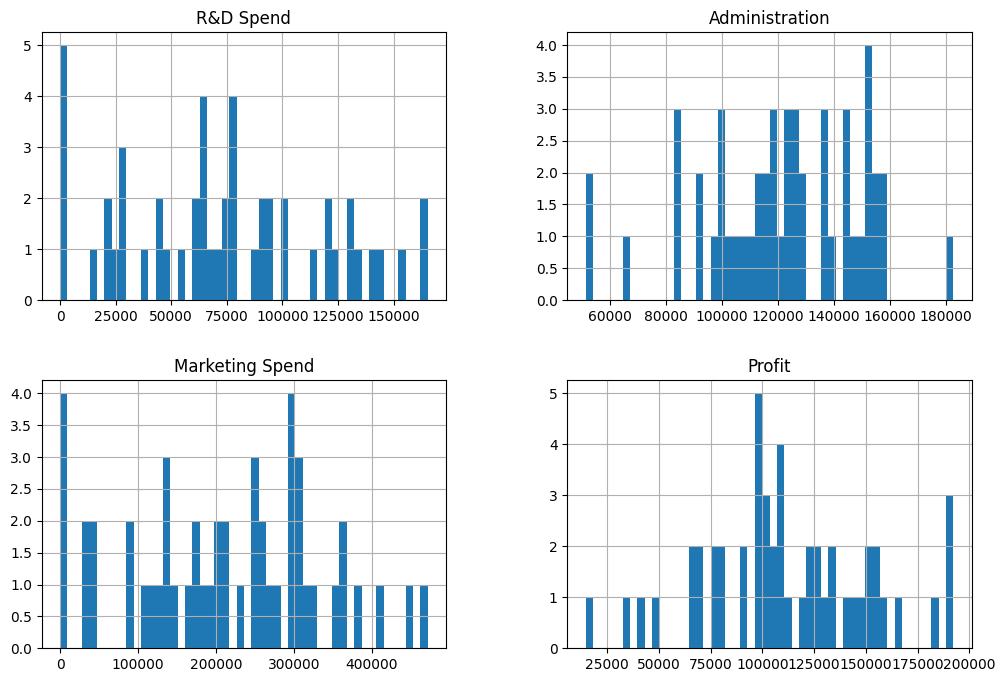

In [5]:
data.hist(bins=50, figsize=(12,8))
plt.show()

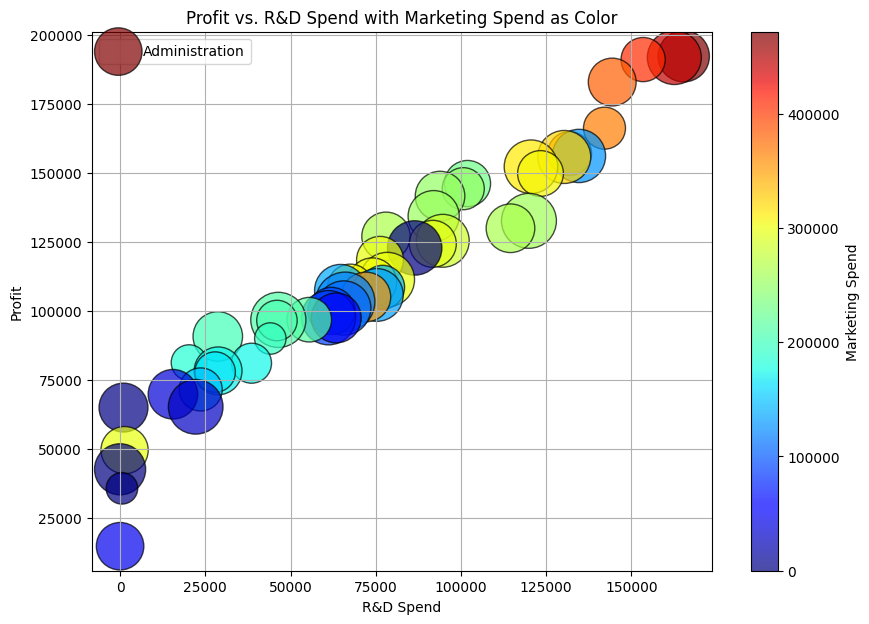

In [6]:
import matplotlib.pyplot as plt

# Scatter plot for visualizing the relationship between two variables
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=data["R&D Spend"],  # Using "R&D Spend" for x-axis
    y=data["Profit"],     # Using "Profit" for y-axis
    c=data["Marketing Spend"],  # Color by "Marketing Spend"
    cmap="jet",
    s=data["Administration"] / 100,  # Size proportional to "Administration"
    alpha=0.7,
    edgecolors="k",  # Black edges for points
    label="Administration"
)
plt.colorbar(scatter, label="Marketing Spend")  # Colorbar for Marketing Spend
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Profit vs. R&D Spend with Marketing Spend as Color")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [7]:
data.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [8]:
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [9]:
X = data[["R&D Spend"]]  # Independent variable
y = data["Profit"]       # Dependent variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
r2_score(y_test, y_pred)

0.9265108109341951

In [15]:
print(lr.intercept_)

49336.6680379911


In [16]:
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [17]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [18]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [19]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [20]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [21]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


In [22]:
X = data.drop(columns=["Profit"])  # Drop the dependent variable
y = data["Profit"]                 # Define the dependent variable

In [23]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50, 4)
Shape of y: (50,)


In [24]:
X = X.values
y = y.values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (40, 4)
Shape of y: (40,)


In [29]:
# Add the import statement for mean_squared_error
from sklearn.metrics import mean_squared_error

X = pd.get_dummies(data.drop(columns=["Profit"]), drop_first=True)  # Encoding categorical variable
y = data["Profit"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate the model
# Now mean_squared_error should be recognized
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 82010363.0443
  R² Score: 0.8987


In [30]:
print(model_multiple.intercept_)

54028.03959364581


In [31]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [32]:
model_multiple.predict(X[0:5])

array([191913.72740386, 187861.47839016, 183805.40426656, 173623.19035613,
       174098.25202594])

In [33]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126362.879083
39   81005.76   84608.453836
30   99937.59   99677.494251
45   64926.08   46357.460686
17  125370.37  128750.482885
